In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.cbook import boxplot_stats
from scipy import stats
from collections import Iterable

In [2]:
data = pd.read_json('CellPhoneReview.json', lines=True)

## Initial Analysis

In [3]:
data.head()

,asin,overall,reviewText,reviewTime,reviewerID,summary,unixReviewTime
0,120401325X,5,These stickers work like the review says they ...,"01 14, 2014",ASY55RVNIL0UD,Really great product.,1389657600
1,120401325X,5,These are awesome and make my phone look so st...,"06 26, 2014",A2TMXE2AFO7ONB,LOVE LOVE LOVE,1403740800
2,120401325X,4,Item arrived in great time and was in perfect ...,"10 21, 2013",AWJ0WZQYMYFQ4,Cute!,1382313600
3,120401325X,5,"awesome! stays on, and looks great. can be use...","02 3, 2013",ATX7CZYFXI1KW,leopard home button sticker for iphone 4s,1359849600
4,120401325X,3,These make using the home button easy. My daug...,"10 12, 2013",APX47D16JOP7H,Cute,1381536000


In [4]:
print(f"Total No. of records: {data.shape[0]}")
print(f"No. of unique products: {data['asin'].nunique()}")
print(f"No. of unique reviewers: {data['reviewerID'].nunique()}")

Total No. of records: 190919
No. of unique products: 10420
No. of unique reviewers: 27874


## Distribution from the Products' Perspective

In [5]:
# from the product perspective, each product receives how many reviews?
productID_arr = data['asin'].values
count_products = dict()

for ID in productID_arr:
    try:
        count_products[ID] += 1
    except:
        count_products[ID] = 1

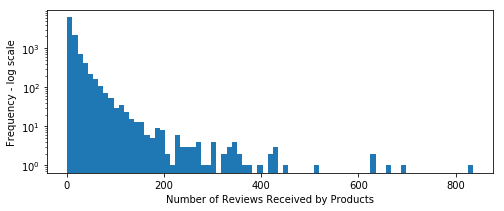

In [33]:
# majority of products has few reviews
fig, ax = plt.subplots(figsize = (8,3))
bin_v = plt.hist(list(count_products.values()), bins=79)
plt.xlabel('Number of Reviews Received by Products', fontsize = 10)
plt.ylabel('Frequency - log scale', fontsize = 10)
plt.yscale('log', nonposy='clip')
# plt.xscale('log')
plt.show()

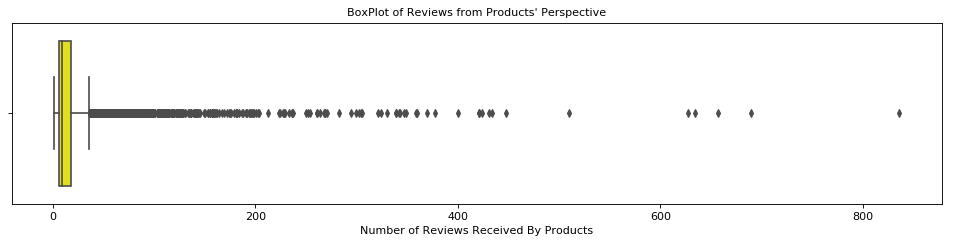

In [36]:
plt.figure(figsize=(15,3), dpi= 80)
sns.boxplot(x=list(count_products.values()), color = 'yellow')
plt.xlabel('Number of Reviews Received By Products', fontsize = 10)
plt.title('BoxPlot of Reviews from Products\' Perspective', fontsize = 10)
plt.show()

In [59]:
#find the percentile of outilers
outliers = [y for stat in boxplot_stats(list(count_products.values())) for y in stat['fliers']]
sorted(outliers)
stats.percentileofscore(list(count_products.values()), 38)

90.39347408829174

In [24]:
# find the midspread of the distribution
q1_product = stats.scoreatpercentile(list(count_products.values()), 25)
q3_product = stats.scoreatpercentile(list(count_products.values()), 75)

print(q1_product, q3_product)

6.0 18.0


## Distribution from the Users' Perspective

In [61]:
# from the users' perspective, each reviewers gave how many reviews?
reviewerID_arr = data['reviewerID'].values
count_reviewers = dict()

for ID in reviewerID_arr:
    try:
        count_reviewers[ID] += 1
    except:
        count_reviewers[ID] = 1

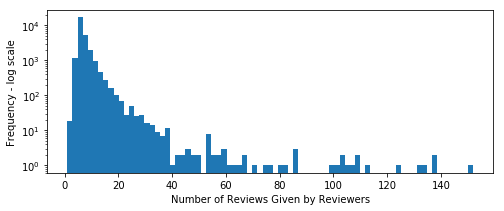

In [62]:
# majority of reviewers post few reviews
fig, ax = plt.subplots(figsize = (8,3))
hist, bin_v, _ = plt.hist(list(count_reviewers.values()), bins=79)
plt.xlabel('Number of Reviews Given by Reviewers', fontsize = 10)
plt.ylabel('Frequency - log scale', fontsize = 10)
plt.yscale('log', nonposy='clip')
# plt.xscale('log')
plt.show()

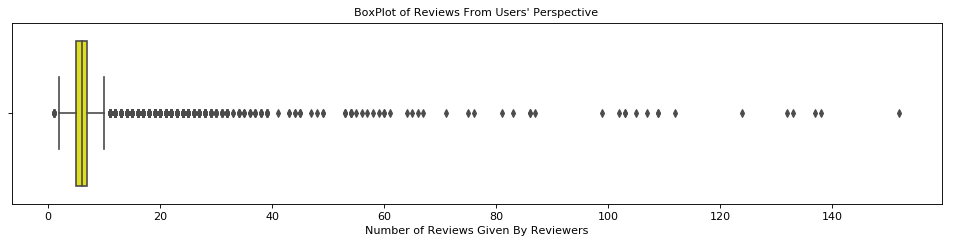

In [63]:
plt.figure(figsize=(15,3), dpi= 80)
sns.boxplot(x=list(count_reviewers.values()), color = 'yellow')
plt.xlabel('Number of Reviews Given By Reviewers', fontsize = 10)
plt.title('BoxPlot of Reviews From Users\' Perspective', fontsize = 10)
plt.show()

In [65]:
#find the percentile of outilers
outliers = [y for stat in boxplot_stats(list(count_reviewers.values())) for y in stat['fliers']]
sorted(outliers)
stats.percentileofscore(list(count_reviewers.values()), 11)

92.78718519050011

In [66]:
#split to five group according to the percentile
grp1_score = stats.scoreatpercentile(list(count_reviewers.values()), 0)
grp2_score = stats.scoreatpercentile(list(count_reviewers.values()), 25)
grp3_score = stats.scoreatpercentile(list(count_reviewers.values()), 50)
grp4_score = stats.scoreatpercentile(list(count_reviewers.values()), 75)
grp5_score = stats.scoreatpercentile(list(count_reviewers.values()), 92)

In [67]:
# What is the least number of reviews given by users in each group?
print(grp1_score)
print(grp2_score)
print(grp3_score)
print(grp4_score)
print(grp5_score)

1.0
5.0
6.0
7.0
11.0


In [71]:
def grpID(score1, score2, count_reviewers_dict):
    '''gather all reviewers IDs from each group'''
    
    ID_list = []
    for ID in count_reviewers_dict:
        if score1 <= count_reviewers_dict[ID] < score2:
            ID_list.append(ID)
            
    return ID_list

In [72]:
grp1_ID = grpID(grp1_score, grp2_score, count_reviewers)
grp2_ID = grpID(grp2_score, grp3_score, count_reviewers)
grp3_ID = grpID(grp3_score, grp4_score, count_reviewers)
grp4_ID = grpID(grp4_score, grp5_score, count_reviewers)
grp5_ID = grpID(grp5_score, max(count_reviewers.values()) + 1, count_reviewers)

In [73]:
# number of reviewers in each group
print(len(grp1_ID))
print(len(grp2_ID))
print(len(grp3_ID))
print(len(grp4_ID))
print(len(grp5_ID))

1168
11497
5675
7242
2292


## Do active reviewers like to give low ratings?

In [75]:
def grpRating(grpID, reviewerID_arr, rating_arr):
    '''gather all reviewers' ratings from each group'''
    
    grp_ID_rating_dict = dict()

    for ID in grpID:
        grp_ID_rating_dict[ID] = []

    for idx in range(len(reviewerID_arr)):
        try:
            grp_ID_rating_dict[reviewerID_arr[idx]].append(rating_arr[idx])
        except:
            continue

    master_list = []
    nested_list = list(grp_ID_rating_dict.values())
    for ls in nested_list:
        master_list += ls
            
    return master_list

In [76]:
rating_arr = data['overall'].values
grp1_ratings = grpRating(grp1_ID, reviewerID_arr, rating_arr)
grp2_ratings = grpRating(grp2_ID, reviewerID_arr, rating_arr)
grp3_ratings = grpRating(grp3_ID, reviewerID_arr, rating_arr)
grp4_ratings = grpRating(grp4_ID, reviewerID_arr, rating_arr)
grp5_ratings = grpRating(grp5_ID, reviewerID_arr, rating_arr)

In [77]:
def ratingFraction(grpRating):
    '''compute reviewers' ratings proportion from each group'''
    
    fraction_list = []
    num_ratings = len(grpRating)
    
    for rating in range(1,6):
        frac = (np.sum(np.array(grpRating)==rating))/num_ratings
        fraction_list.append(frac)

    return fraction_list

In [78]:
grp1_frac = ratingFraction(grp1_ratings)
grp2_frac = ratingFraction(grp2_ratings)
grp3_frac = ratingFraction(grp3_ratings)
grp4_frac = ratingFraction(grp4_ratings)
grp5_frac = ratingFraction(grp5_ratings)

In [79]:
print(grp1_frac)
print(grp2_frac)
print(grp3_frac)
print(grp4_frac)
print(grp5_frac)

[0.07732749178532311, 0.05607886089813801, 0.10164293537787514, 0.19978094194961665, 0.5651697699890471]
[0.07836826998347395, 0.06293815778029051, 0.11159432895537967, 0.20177437592415412, 0.5453248673567017]
[0.07353891336270191, 0.05720998531571219, 0.11004405286343612, 0.19732745961820852, 0.5618795888399413]
[0.06721474230574957, 0.05692090641492345, 0.11500879591730095, 0.20706111856199816, 0.5537944368000278]
[0.04964444206811741, 0.048093888680960276, 0.10281772977597177, 0.21884189702186815, 0.5806020424530824]


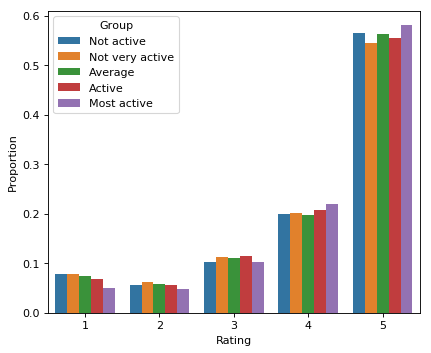

In [87]:
rating_frac_frame = pd.DataFrame({'Group': ['Not active', 'Not very active', 'Average', 'Active', 'Most active']*5,
                                  'Rating':['1']*5 + ['2']*5 + ['3']*5 + ['4']*5 + ['5']*5,
                                   'Proportion': np.array([grp1_frac, grp2_frac, grp3_frac, grp4_frac, grp5_frac]).T.ravel()})

plt.figure(figsize=(6,5), dpi= 80)
sns.barplot(x="Rating", y="Proportion", hue="Group", data=rating_frac_frame)
plt.show()

/home/tmx/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/tmx/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/tmx/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/tmx/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/tm

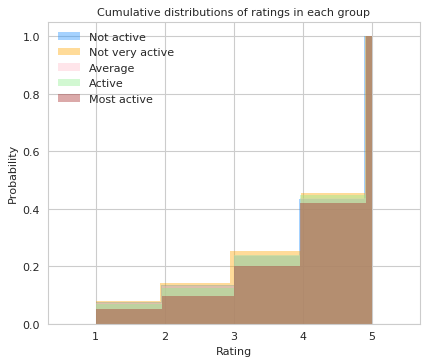

In [88]:
kwargs = dict( hist_kws={'cumulative': True}, kde_kws={'cumulative': True, 'linewidth':0})

plt.figure(figsize=(6,5), dpi= 80)
sns.set(style="whitegrid")
sns.distplot(grp1_ratings, color="dodgerblue", label="Not active", **kwargs)
sns.distplot(grp2_ratings, color="orange", label="Not very active", **kwargs)
sns.distplot(grp3_ratings, color="pink", label="Average", **kwargs)
sns.distplot(grp4_ratings, color="lightgreen", label="Active", **kwargs)
sns.distplot(grp5_ratings, color="brown", label="Most active", **kwargs)


plt.xlabel('Rating', fontsize = 10)
plt.ylabel('Probability', fontsize = 10)
plt.title('Cumulative distributions of ratings in each group', fontsize = 10)
plt.legend()
plt.show()